In [2]:
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.optimize as opt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from copy import deepcopy
from utils import boxplot_significance, extract_data, violinplot_significance, splitedviolinplot_significance # per importare dento al codice (utils.py) le def (in questo caso boxplot_significance e extract_data)


In [3]:
# qui ogni volta va chiamata la cartella corretta del file di Log

json_files = [pos_json for pos_json in os.listdir("Log") if pos_json.endswith('.json')]
data = []
for index, js in enumerate(json_files):
    with open(os.path.join('./Log/', js)) as json_file:
        json_text = json.load(json_file)
        data.append(json_text)

print(json_files)
print(len(json_files))

['logfile_20250411_114956.json', 'logfile_20250403_122328.json', 'logfile_20250403_102854.json', 'logfile_20250328_111350.json', 'logfile_20250402_154441.json', 'logfile_20250321_122554.json', 'logfile_20250319_094340.json', 'logfile_20250327_161307.json', 'logfile_20250404_175224.json', 'logfile_20250319_120923.json', 'logfile_20250402_101522.json', 'logfile_20250327_103947.json', 'logfile_20250411_170105.json', 'logfile_20250320_113159.json', 'logfile_20250416_093830.json', 'logfile_20250402_172451.json', 'logfile_20250321_155138.json', 'logfile_20250404_155009.json', 'logfile_20250411_152611.json', 'logfile_20250319_151412.json', 'logfile_20250320_154557.json', 'logfile_20250320_132144.json', 'logfile_20250410_152658.json', 'logfile_20250327_175815.json', 'logfile_20250328_155903.json', 'logfile_20250410_172416.json', 'logfile_20250320_182801.json', 'logfile_20250327_123422.json', 'logfile_20250416_174530.json', 'logfile_20250326_133256.json', 'logfile_20250326_103619.json', 'logfil

In [4]:
names = []
for idx in range(len(data)):
    log = data[idx]
    names.append(log["user"]["nickname"])
    
new_order = [names.index(name) for name in sorted(names)]

new_data = []
for idx in new_order:
    new_data.append(data[idx])
data = deepcopy(new_data)

*Per fare i grafici slited per trial (i.e., grafici con i box colorati)*

In [5]:
def count_box_opened(trial_events):
    hist = []
    outcomes = []
    for event in trial_events:
        if event["trialEvent"].startswith("Opened"):
            hist.append(event["room"])

            o = event['outcome'][0]
            if o['x'] > 0:
                o_str = 'Empty'
            elif o['w'] > 0:
                o_str = 'Coin'
            else:
                o_str = 'Unknown'  # O un altro valore predefinito per gestire il caso di errore
            print("Errore: outcome sconosciuto (c'è moneta d'argento)", o)
            
            outcomes.append(o_str)
        
    count = Counter({"North": 0, "South": 0, "East": 0, "West": 0})
    count.update(hist)
    return hist, count, outcomes

def count_box_opened_over_trials(trials):
    counts = {room: [] for room in ["North", "South", "East", "West"]}
    hists = []
    outcomes_all = []
    for trial in trials:
        hist, count, outcomes = count_box_opened(trial["events"])
        for room in ["North", "South", "East", "West"]:
            counts[room].append(count[room])
        outcomes_all.append(outcomes)
        hists.append(hist)
    return counts, hists, outcomes_all




In [6]:
cols_standard = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = {"North": cols_standard[0], "South": cols_standard[1], "East": cols_standard[2], "West": cols_standard[3]}

print(cols_standard)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [7]:
import numpy as np

ages = []  # Lista per memorizzare le età

# Itera attraverso ogni elemento in data
for idx in range(len(data)):
    log = data[idx]  # Ottieni l'elemento corrente (un dizionario)
    try:
        age = float(log["user"]["age"])  # Estrai e converte l'età in numero (float)
        ages.append(age)  # Aggiungi l'età alla lista ages
    except ValueError:
        print(f"Errore: l'età per l'elemento {idx} non è un numero valido.")

# Ordina la lista delle età dal più piccolo al più grande
ages.sort()

# Calcola la media e la deviazione standard
mean_age = np.mean(ages)
std_age = np.std(ages)

# Stampa i risultati
print(f"Età ordinate: {ages}")
print(f"Media delle età: {mean_age:.2f}")
print(f"Deviazione standard delle età: {std_age:.2f}")






Età ordinate: [18.0, 19.0, 19.0, 20.0, 21.0, 21.0, 21.0, 21.0, 22.0, 22.0, 23.0, 23.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 26.0, 26.0, 26.0, 27.0, 27.0, 28.0, 28.0, 28.0, 30.0, 30.0, 31.0, 31.0, 32.0, 35.0, 40.0]
Media delle età: 25.50
Deviazione standard delle età: 4.74


In [8]:
nicknames = {}
counter = 0
line_positions = [3.5, 13.5, 23.5, 33.5, 43.5, 53.5]

for idx in range(len(data)):
    log = data[idx]
    name = log["user"]["nickname"]
    
    if name not in nicknames:
        if len(nicknames) < 34: # Ignora eventuali altri soggetti oltre i primi *il numero che metto*
            counter += 1
            nicknames[name] = counter
        else:
            continue 

    participant_code = str(nicknames[name])
   

    #_, hists = count_box_opened_over_trials(log["trials"])
    _, hists, outcomes = count_box_opened_over_trials(log["trials"])

    plt.figure(figsize=(10, 6)) # era 10,3...quindi ho ingrandito un po' la size della figura sulla y
    plt.title("Subject " + participant_code)
    for x, hist in enumerate(hists): #enumerate viene usato per ottenere sia l'indice x che il valore hist da ogni elemento di hists
        y = 0
        for k, room in enumerate(hist):
            plt.scatter(x, y, color=colors[room], marker="s", s=70, edgecolors="k")     

            if outcomes[x][k] == 'Coin':
                plt.text(x, y, '⋆', color='k', ha='center', va='center', fontsize=15)

            #mettere qui la stellina * (se ricca metti stella, se povera non metti nulla)
            #guardare z order per spostare su y - order in layer
            #parametro alpha, va da 0 a 1 - 0 se trasparente
            y += 1
    
    for x, trial in enumerate(log["trials"]): # qui ciclo tra gli elementi della lista log["trials"].  NB: uso enumerate perchè mi dà sia l'indice (x) che il valore (trial) di ogni elemento nella lista.
        trialCode = trial["trialCode"] # per ciascun elemento trials nella lista io voglio il suo trialCode
        plt.text(x , -2.5, trialCode, ha='center', va='center', rotation='vertical') # per scrivere sotto ogni riga il nome del trial (trialCode)
        #commento la riga sopra: x é la posizione orizzontale della colonna corrente nel grafico, -2.5 è posizione sull'asse verticale della scritta
        

    plt.yticks([])
    plt.ylabel("# Boxes opened")
    plt.xlabel("Trials")
    plt.xticks([])
    plt.axis("equal") # per avere lo spazio figura-bordo uguale sia su x che su y
    plt.tight_layout()

    handles = [] # qui sto inizializzando una lista vuota
    for room, color in colors.items():
        patch = mpatches.Patch(color=color, label=room)
        handles.append(patch) #qui riempio la lista che ho creato 3 righe sopra
    plt.legend(handles=handles) #per creare la legenda

    for l_pos in line_positions:
        if l_pos < x:
            plt.plot([l_pos,l_pos],[-10,20],'k')


    # qui sotto metto la x sui trials che hanno violazione della regola ovvero, come dice il commento sotto, trial il cui trialcode finisce con 3 o 8
    
    for x, trial in enumerate(log["trials"]):  
        trialCode = trial["trialCode"]  
        plt.text(x, -2.5, trialCode, ha='center', va='center', rotation='vertical')  

        # Add an "X" if the trialCode ends with 3 or 8, except "tutorial_3"
        if trialCode.endswith('3') or trialCode.endswith('8'):
            if trialCode != "tutorial_3":
                plt.text(x, -5, 'X', ha='center', va='center', fontsize=12, color='black', fontweight='bold')  





    plt.savefig("Out/Subject" + participant_code + name + "_hists.png", dpi=300)
    plt.clf()                               



Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 0.0, 'w': 1.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 0.0, 'w': 1.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 0.0, 'w': 1.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 0.0, 'w': 1.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 0.0, 'w': 1.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 1.0, 'w': 0.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 1.0, 'w': 0.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 1.0, 'w': 0.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 1.0, 'w': 0.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 0.0, 'w': 1.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 1.0

/var/folders/0g/b__jgt415791qz3xxph3zprh0000gn/T/ipykernel_3739/2425942830.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6)) # era 10,3...quindi ho ingrandito un po' la size della figura sulla y


Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 1.0, 'w': 0.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 1.0, 'w': 0.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 0.0, 'w': 1.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 0.0, 'w': 1.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 0.0, 'w': 1.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 0.0, 'w': 1.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 1.0, 'w': 0.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 1.0, 'w': 0.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 1.0, 'w': 0.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 1.0, 'w': 0.0}
Errore: outcome sconosciuto (c'è moneta d'argento) {'x': 0.0, 'y': 0.0, 'z': 1.0

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

*Per fare i grafici splited per area*


In [9]:
def count_box_opened(trial_events):
    hist = []
    for event in trial_events:
        if event["trialEvent"].startswith("Opened"):
            hist.append(event["room"])

    count = Counter({"North": 0, "South": 0, "East": 0, "West": 0})
    count.update(hist)
    return hist, count

def count_box_opened_over_trials(trials):
    counts = {room: [] for room in ["North", "South", "East", "West"]}
    hists = []
    for trial in trials:
        hist, count = count_box_opened(trial["events"])
        for room in ["North", "South", "East", "West"]:
            counts[room].append(count[room])
        hists.append(hist)
    return counts, hists


In [10]:
colors = {"North": "royalblue", "South": "darkorange", "East": "green", "West": "firebrick"}

In [11]:
# import random
# import matplotlib.pyplot as plt
# import numpy as np

# # Supponiamo che data e count_box_opened_over_trials siano già definiti correttamente
# for idx in range(len(data)):
#     log = data[idx]
    
#     # Usa "Soggetto 1", "Soggetto 2", ecc. invece del nome
#     # subject_id = idx + 1
#     if name not in nicknames:
#         if len(nicknames) < 14: # Ignora eventuali altri soggetti oltre i primi *il numero che metto*
#             counter += 1
#             nicknames[name] = counter
#         else:
#             continue 

#     participant_code = str(nicknames[name])
   

#     counts, _ = count_box_opened_over_trials(log["trials"]) 
#     plt.figure(figsize=(5, 5))
#     plt.suptitle(f"Subject_ {participant_code}")  # Cambia il titolo per mostrare "Subject 1", "Subject 2", ecc.
    
#     # Ciclo per ogni area (4 grafici per soggetto)
#     for x, (roomName, count) in enumerate(counts.items()):
#         plt.subplot(4, 1, x + 1)
#         plt.plot(np.arange(64), count, ".", color=colors[roomName], alpha=.5)
#         plt.plot(np.arange(64), count, color="k", alpha=.2)
        
#         plt.title(roomName, color=colors[roomName], fontweight="bold")
#         plt.ylim([-0.5, 10])
#         plt.yticks([0, 1, 2, 3, 4, 5])
#         plt.xlim([0, 64])
        
#         # Rimuovo le etichette x per tutti i grafici tranne l'ultimo
#         if x != 3:
#             plt.xticks([])  # Rimuove le etichette x da tutti tranne l'ultimo grafico
#         else:
#             plt.xlabel("Trial number")  # Solo sull'ultimo grafico


#         # Aggiungi linee verticali per ogni grafico separato
#         for v in range(0, 6 ):  # Linee verticali su tutti i grafici
#             if v == 0:
#                 # Prima linea dopo 4 numeri
#                 plt.axvline(4 + v * 20, color="k", alpha=0.5)
#                 plt.text(4 + v * 20 + 8, 6, "NS", ha='center')  # Testo "NS" per la prima linea
#             else:
#                 # Linee successive ogni 10 numeri
#                 plt.axvline(4 + v * 10, color="k", alpha=0.5)
#                 plt.text(4 + v * 8 + 8, 6, "EW" if v % 2 == 1 else "NS", ha='center')  # Alterna tra "NS" e "EW"
    
    
#     plt.tight_layout()
#     plt.savefig(f"Out/Subject{participant_code}_perarea.png", dpi=300)
#     plt.clf()


Per fare i grafici delle scelte prese (number_of_correct_choices,percent_correct_choices_over_actions, number_correct_choices_over_first_10) da ogni soggetto per ogni blocco (intero)

In [12]:
user_data = {}
for idx in range(len(data)):
    log = data[idx]
    # Usa "Soggetto 1", "Soggetto 2", ecc. invece del nome
    subject_id = idx + 1
    

    _, hists = count_box_opened_over_trials(log["trials"])
    
    number_of_correct_choices = []
    percent_correct_choices_over_actions = []
    number_correct_choices_over_first_10 = []
    for trial_number,hist in enumerate(hists[4:]):
        if (trial_number//10)%2 == 0: # Se il blocco è pari, le risposte corrette sono "North" e "South".
            corrects = hist.count("North")+hist.count("South")
        else: # Se il blocco è dispari, le risposte corrette sono "West" e "East".
            corrects = hist.count("West")+hist.count("East")
        number_of_correct_choices.append(corrects)
        percent_correct_choices_over_actions.append(corrects/len(hist))
        
        if (trial_number//10)%2 == 0:
            corrects = hist[:10].count("North")+hist[:10].count("South")
        else:
            corrects = hist[:10].count("West")+hist[:10].count("East")
            
        if len(hist)<10:
            corrects /= len(hist)
        else:
            corrects /= 10
        number_correct_choices_over_first_10.append(corrects)
    
    user_data[idx] = {}
    user_data[idx]["number_of_correct_choices"] = number_of_correct_choices # numero di scelte corrette per trial - conta le volte che nel trial NS as esempio sei entrato a N o S.
    user_data[idx]["percent_correct_choices_over_actions"] = percent_correct_choices_over_actions # percentuale di scelte corrette rispetto al totale delle azioni
    user_data[idx]["number_correct_choices_over_first_10"] = number_correct_choices_over_first_10 # numero di scelte corrette nei primi 10 tentativi, normalizzato.

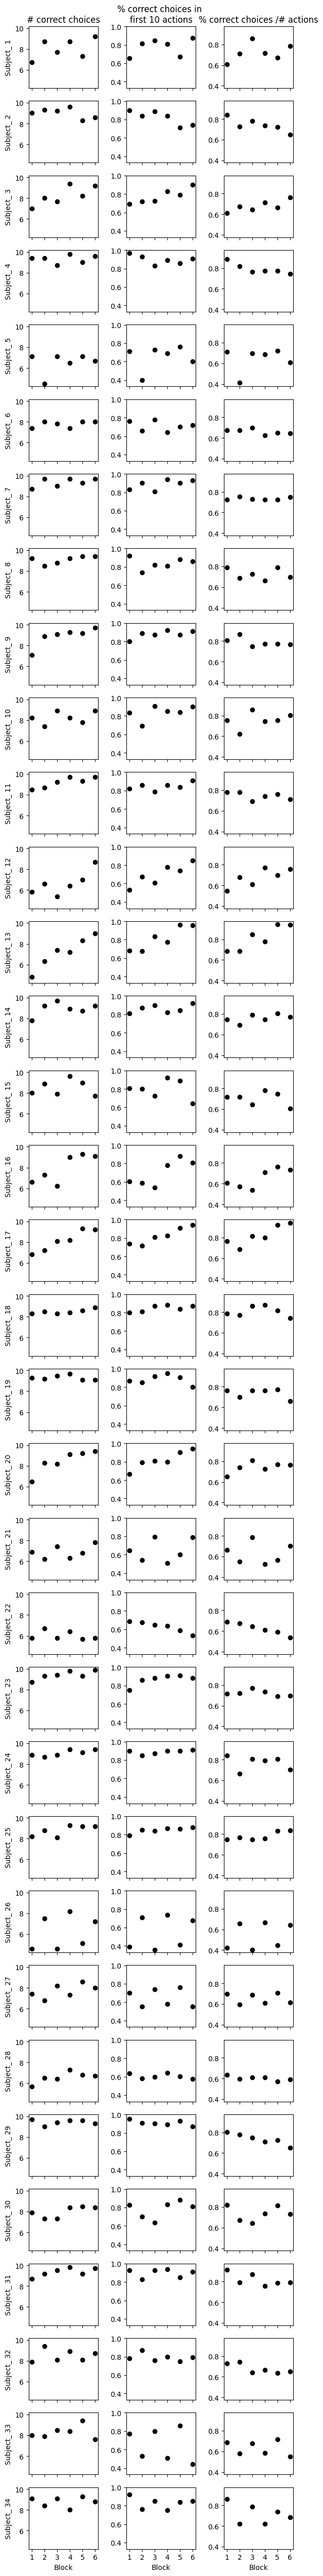

In [13]:
fig, axs = plt.subplots(len(data), 3, sharex=True, sharey="col", figsize=(6, len(data) * 1.5), squeeze=False)

for i in range(3):
    axs[0, i].set_title(["# correct choices", "% correct choices in \nfirst 10 actions",  "% correct choices /# actions", ][i])
    axs[len(data) - 1, i].set_xlabel("Block")

for idx in range(len(data)):
    subject_id = idx + 1  # Assegna un numero al soggetto
    
    axs[idx, 0].set_ylabel(f"Subject_ {subject_id}")  # Usa "Subject X" invece del nickname
    
    for j, temp in enumerate([
        user_data[idx]["number_of_correct_choices"],
        user_data[idx]["number_correct_choices_over_first_10"],
        user_data[idx]["percent_correct_choices_over_actions"]
    ]):
        x_values = np.arange(1, 7)  # Genera i valori x da 1 a 4
        y_values = [np.mean(temp[(i * 10):(i * 10 + 10)]) for i in range(6)]
        
        axs[idx, j].scatter(x_values, y_values, color='black')
        axs[idx, j].set_xticks([1, 2, 3, 4,5,6])  # Imposta le etichette dell'asse x
        axs[idx, j].set_xticklabels([1, 2, 3, 4,5,6])

plt.tight_layout()
plt.savefig("Out/summary_NOsplitedhalfs.png", dpi=300)

Per fare i grafici delle scelte prese (number_of_correct_choices,percent_correct_choices_over_actions, number_correct_choices_over_first_10) da ogni soggetto per ogni blocco (diviso tra prima e seconda metà, ovvero primi 5 e ultimi 5 trials)

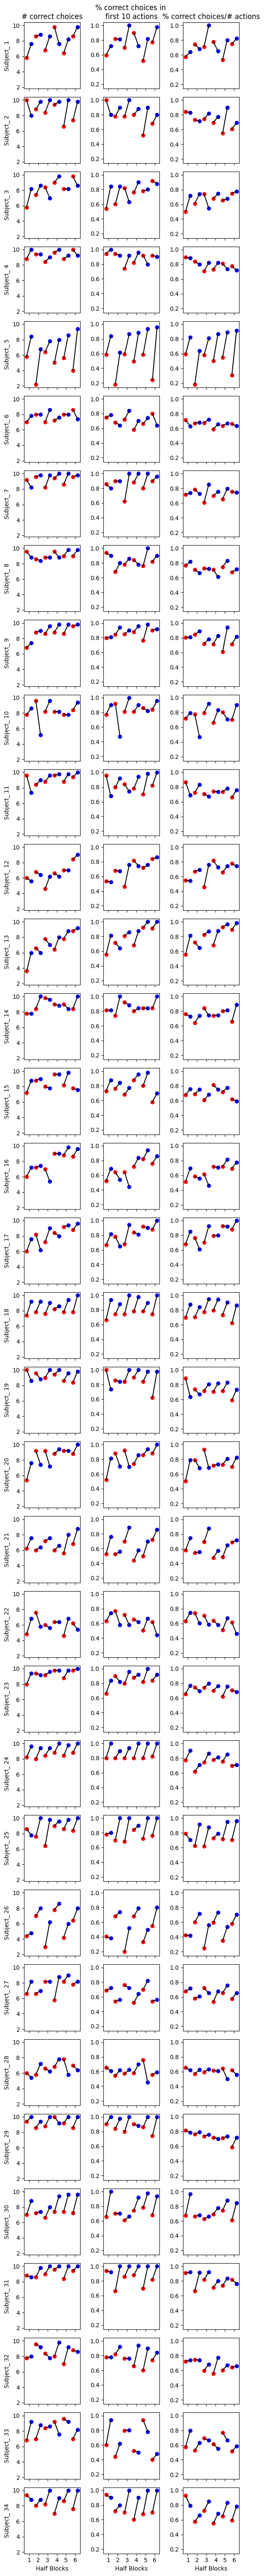

In [14]:
import matplotlib.pyplot as plt
import numpy as np



fig, axs = plt.subplots(len(data), 3, sharex=True, sharey="col", figsize=(6, len(data) * 1.8), squeeze=False)


# Set titles and labels for the subplots
for i in range(3):
    axs[0, i].set_title(["# correct choices", "% correct choices in \nfirst 10 actions", "% correct choices/# actions"][i])
    axs[len(data)-1, i].set_xlabel("Half Blocks")

# Loop through data and plot the values
for idx in range(len(data)):
    # Replace nickname with "Subject {idx + 1}"
    subject_id = idx + 1

    axs[idx, 0].set_ylabel(f"Subject_ {subject_id}")  # Set y-axis label to "Subject X"
    
    for j, temp in enumerate([
        user_data[idx]["number_of_correct_choices"],
        user_data[idx]["number_correct_choices_over_first_10"],
        user_data[idx]["percent_correct_choices_over_actions"]
    ]):
        # Generate x_values (1, 2, 3, ..., 12)
        x_values = np.arange(1, 13)  # For 12 points
        
        # Generate y_values by calculating the mean for each group of 5 elements
        y_values = [np.mean(temp[(i*5):(i*5+5)]) for i in range(12)]  # Assuming `temp` is long enough for this
        
        # Scatter plot with alternating colors
        for i in range(12):
            color = "red" if i % 2 == 0 else "blue"
            axs[idx, j].scatter(x_values[i], y_values[i], color=color)
        
        # Plot lines connecting pairs of red and blue points
        for i in range(0, 12, 2):
            axs[idx, j].plot([x_values[i], x_values[i + 1]], [y_values[i], y_values[i + 1]], color='black')


        axs[idx, 0].set_xticks([1.5, 3.5, 5.5, 7.5, 9.5, 11.5])
        axs[idx, 0].set_xticklabels(["1", "2", "3", "4", "5", "6"])

plt.tight_layout()
plt.savefig("Out/summary_splitedhalfs.png", dpi=300)


Qui voglio fare le medie tra tutti i partecipanti per ogni condizione

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


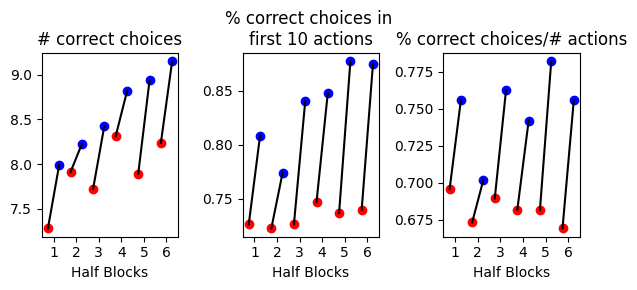

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Compute mean values across all participants
num_subjects = len(data)
x_values = np.arange(1, 13)  # 12 points

# Compute mean across all subjects for each metric
mean_values = [
    np.mean([np.mean(user_data[idx]["number_of_correct_choices"][(i * 5):(i * 5 + 5)]) for idx in range(num_subjects)], axis=0)
    for i in range(num_subjects)
]
mean_first_10 = [
    np.mean([np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 5):(i * 5 + 5)]) for idx in range(num_subjects)], axis=0)
    for i in range(num_subjects)
]
mean_over_actions = [
    np.mean([np.mean(user_data[idx]["percent_correct_choices_over_actions"][(i * 5):(i * 5 + 5)]) for idx in range(num_subjects)], axis=0)
    for i in range(num_subjects)
]

# Create a single row of three subplots
fig, axs = plt.subplots(1, 3, sharex=True, sharey="col", figsize=(6, 3), squeeze=False)

# Titles for the three graphs
titles = ["# correct choices", "% correct choices in \nfirst 10 actions", "% correct choices/# actions"]

# Plot each metric
for j, temp in enumerate([mean_values, mean_first_10, mean_over_actions]):
    axs[0, j].set_title(titles[j])
    axs[0, j].set_xlabel("Half Blocks")

    # Scatter plot with alternating colors
    for i in range(12):
        color = "red" if i % 2 == 0 else "blue"
        axs[0, j].scatter(x_values[i], temp[i], color=color)

    # Plot lines connecting pairs of red and blue points
    for i in range(0, 12, 2):
        axs[0, j].plot([x_values[i], x_values[i + 1]], [temp[i], temp[i + 1]], color='black')

# Adjust x-ticks
axs[0, 0].set_xticks([1.5, 3.5, 5.5, 7.5, 9.5, 11.5])
axs[0, 0].set_xticklabels(["1", "2", "3", "4", "5", "6"])

plt.tight_layout()
plt.savefig("Out/summary_mean_splitedhalfs.png", dpi=300)                   


Qui faccio la ratio entro ogni blocco tra seconda metà del blocco / prima metà del blocco per tutte e tre le variabili investigate

A value greater than 1 indicates that the second half of the blocks has a higher number of correct choices/% correct choices in first 10 actions/ % correct choices over number of actions, compared to the first half.

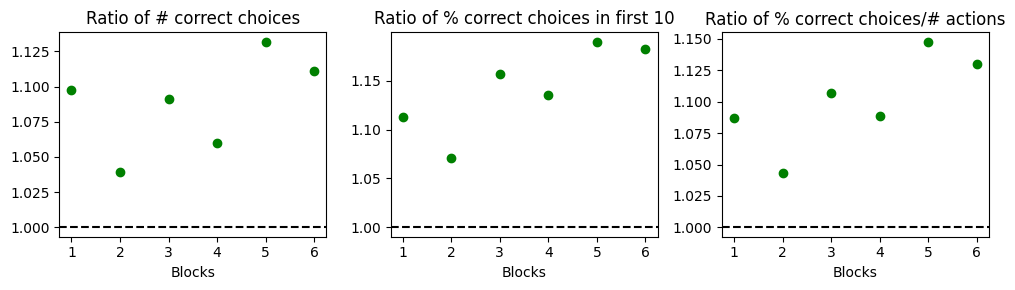

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Compute mean values across all participants
num_subjects = len(data)
x_values = np.arange(1, 7)  # 6 blocks

# Compute Ratio: Second Half / First Half
ratio_values = []
ratio_first_10 = []
ratio_over_actions = []

for i in range(6):  # Iterate over 6 blocks
    first_half = np.mean([np.mean(user_data[idx]["number_of_correct_choices"][(i * 10):(i * 10 + 5)]) for idx in range(num_subjects)])
    second_half = np.mean([np.mean(user_data[idx]["number_of_correct_choices"][(i * 10 + 5):(i * 10 + 10)]) for idx in range(num_subjects)])
    ratio_values.append(second_half / first_half if first_half != 0 else np.nan)
    
    first_half_10 = np.mean([np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 10):(i * 10 + 5)]) for idx in range(num_subjects)])
    second_half_10 = np.mean([np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 10 + 5):(i * 10 + 10)]) for idx in range(num_subjects)])
    ratio_first_10.append(second_half_10 / first_half_10 if first_half_10 != 0 else np.nan)
    
    first_half_actions = np.mean([np.mean(user_data[idx]["percent_correct_choices_over_actions"][(i * 10):(i * 10 + 5)]) for idx in range(num_subjects)])
    second_half_actions = np.mean([np.mean(user_data[idx]["percent_correct_choices_over_actions"][(i * 10 + 5):(i * 10 + 10)]) for idx in range(num_subjects)])
    ratio_over_actions.append(second_half_actions / first_half_actions if first_half_actions != 0 else np.nan)

# Create a single row of three subplots
fig, axs = plt.subplots(1, 3, sharex=True, sharey="col", figsize=(10, 3), squeeze=False)

titles = ["Ratio of # correct choices", "Ratio of % correct choices in first 10", "Ratio of % correct choices/# actions"]

# Plot each metric ratio
for j, temp in enumerate([ratio_values, ratio_first_10, ratio_over_actions]):
    axs[0, j].set_title(titles[j])
    axs[0, j].set_xlabel("Blocks")
    axs[0, j].scatter(x_values, temp, color="green")
    axs[0, j].axhline(y=1, color='black', linestyle='--')  # Baseline at y=1

axs[0, 0].set_xticks([1, 2, 3, 4, 5, 6])
axs[0, 0].set_xticklabels(["1", "2", "3", "4", "5", "6"])

plt.tight_layout()
plt.savefig("Out/ratio_second_first.png", dpi=300) 
plt.show()

=== Analisi delle Ratio ===
Ratio di # risposte corrette per blocco: [1.0977, 1.0394, 1.0914, 1.0602, 1.1319, 1.1107]
T-statistic per # risposte corrette: 6.4332, P-value: 0.0013
→ La ratio è significativamente diversa da 1 per il numero di risposte corrette.

Ratio dei primi 10 trials: [1.1126, 1.0713, 1.1563, 1.135, 1.1898, 1.1821]
T-statistic per i primi 10 trials: 7.7297, P-value: 0.0006
→ La ratio è significativamente diversa da 1 per i primi 10 trials.

Ratio % risposte corrette/azioni: [1.0868, 1.0431, 1.1066, 1.0882, 1.1477, 1.1296]
T-statistic per % risposte corrette/azioni: 6.6877, P-value: 0.0011
→ La ratio è significativamente diversa da 1 per la percentuale di risposte corrette per azioni.


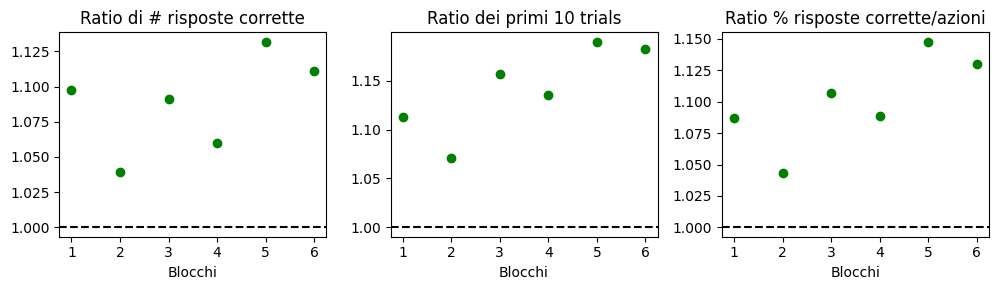

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

# Numero di soggetti
num_subjects = len(data)
x_values = np.arange(1, 7)  # 6 blocchi

# Inizializzare le liste per le tre ratio
ratio_values = []
ratio_first_10 = []
ratio_over_actions = []

# Calcolare le ratio per ciascun blocco
for i in range(6):  # Itera su 6 blocchi
    # Ratio per il numero di risposte corrette
    first_half = np.mean([np.mean(user_data[idx]["number_of_correct_choices"][(i * 10):(i * 10 + 5)]) for idx in range(num_subjects)])
    second_half = np.mean([np.mean(user_data[idx]["number_of_correct_choices"][(i * 10 + 5):(i * 10 + 10)]) for idx in range(num_subjects)])
    ratio_values.append(second_half / first_half if first_half != 0 else np.nan)
    
    # Ratio per il numero di risposte corrette sui primi 10 trials
    first_half_10 = np.mean([np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 10):(i * 10 + 5)]) for idx in range(num_subjects)])
    second_half_10 = np.mean([np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 10 + 5):(i * 10 + 10)]) for idx in range(num_subjects)])
    ratio_first_10.append(second_half_10 / first_half_10 if first_half_10 != 0 else np.nan)
    
    # Ratio per il numero di risposte corrette rispetto al numero di azioni
    first_half_actions = np.mean([np.mean(user_data[idx]["percent_correct_choices_over_actions"][(i * 10):(i * 10 + 5)]) for idx in range(num_subjects)])
    second_half_actions = np.mean([np.mean(user_data[idx]["percent_correct_choices_over_actions"][(i * 10 + 5):(i * 10 + 10)]) for idx in range(num_subjects)])
    ratio_over_actions.append(second_half_actions / first_half_actions if first_half_actions != 0 else np.nan)

# Calcolare i test di significatività (t-test) per ciascuna ratio rispetto a 1
def t_test_for_ratio(ratios):
    t_stat, p_value = ttest_1samp(ratios, popmean=1)
    return t_stat, p_value

# Eseguiamo il t-test per ciascuna delle tre ratio
t_stat_ratio, p_value_ratio = t_test_for_ratio(ratio_values)
t_stat_first_10, p_value_first_10 = t_test_for_ratio(ratio_first_10)
t_stat_over_actions, p_value_over_actions = t_test_for_ratio(ratio_over_actions)

# Stampa dei risultati
print(f"=== Analisi delle Ratio ===")
print(f"Ratio di # risposte corrette per blocco: {[round(r, 4) for r in ratio_values]}")
print(f"T-statistic per # risposte corrette: {t_stat_ratio:.4f}, P-value: {p_value_ratio:.4f}")
if p_value_ratio < 0.05:
    print("→ La ratio è significativamente diversa da 1 per il numero di risposte corrette.")
else:
    print("→ Nessuna differenza significativa per il numero di risposte corrette.")

print(f"\nRatio dei primi 10 trials: {[round(r, 4) for r in ratio_first_10]}")
print(f"T-statistic per i primi 10 trials: {t_stat_first_10:.4f}, P-value: {p_value_first_10:.4f}")
if p_value_first_10 < 0.05:
    print("→ La ratio è significativamente diversa da 1 per i primi 10 trials.")
else:
    print("→ Nessuna differenza significativa per i primi 10 trials.")

print(f"\nRatio % risposte corrette/azioni: {[round(r, 4) for r in ratio_over_actions]}")
print(f"T-statistic per % risposte corrette/azioni: {t_stat_over_actions:.4f}, P-value: {p_value_over_actions:.4f}")
if p_value_over_actions < 0.05:
    print("→ La ratio è significativamente diversa da 1 per la percentuale di risposte corrette per azioni.")
else:
    print("→ Nessuna differenza significativa per la percentuale di risposte corrette per azioni.")

# === Grafico delle ratio ===
# Creiamo una riga con tre subplots
fig, axs = plt.subplots(1, 3, sharex=True, sharey="col", figsize=(10, 3), squeeze=False)

titles = ["Ratio di # risposte corrette", "Ratio dei primi 10 trials", "Ratio % risposte corrette/azioni"]

# Traccia ogni ratio
for j, temp in enumerate([ratio_values, ratio_first_10, ratio_over_actions]):
    axs[0, j].set_title(titles[j])
    axs[0, j].set_xlabel("Blocchi")
    axs[0, j].scatter(x_values, temp, color="green")
    axs[0, j].axhline(y=1, color='black', linestyle='--')  # Linea di riferimento a y=1

axs[0, 0].set_xticks([1, 2, 3, 4, 5, 6])
axs[0, 0].set_xticklabels(["1", "2", "3", "4", "5", "6"])

plt.tight_layout()
plt.savefig("Out/ratio_second_first.png", dpi=300)
plt.show()


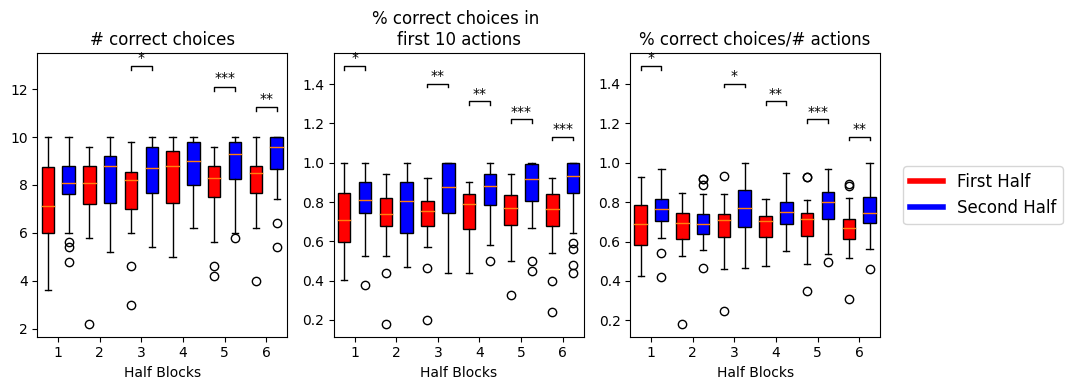

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats  
import matplotlib.lines as mlines

# Funzione per disegnare i boxplot con le barre di significato
def boxplot_significance(ax, data, test_type='t-test', combinations=None, bar_space=0.1, y_offset=0.4, colors=None):  
    significant_combinations = []
    ls = list(range(len(data)))

    if combinations is None:
        combinations = [(ls[x], ls[x + 1]) for x in range(0, len(ls) - 1, 2)]

    for c in combinations:
        data1, data2 = data[c[0]], data[c[1]]

        # Esegui il test di significato
        if test_type == 't-test':
            _, p = stats.ttest_ind(data1, data2, alternative='two-sided') 
        elif test_type == 'mann-whitney':     
            _, p = stats.mannwhitneyu(data1, data2, alternative='two-sided')

        # Salva solo i risultati significativi (p < 0.05)
        if p < 0.05:
            significant_combinations.append([c, p])

    # Boxplot con colori personalizzati
    box = ax.boxplot(data, patch_artist=True, widths=0.6)
    for i, patch in enumerate(box['boxes']):
        patch.set_facecolor(colors[i])
    
    bottom, top = ax.get_ylim()
    yrange = top - bottom

    # Disegna le barre di significato
    for i, significant_combination in enumerate(significant_combinations):
        x1, x2 = significant_combination[0][0] + 1, significant_combination[0][1] + 1
        level = len(significant_combinations) - i  
        bar_height = (yrange * bar_space * level) + top  # Le barre sono posizionate più in alto
        bar_tips = bar_height - (yrange * 0.02)

        ax.plot([x1, x1, x2, x2], [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')

        # Determina il livello di significato
        p = significant_combination[1]
        sig_symbol = '***' if p < 0.001 else '**' if p < 0.01 else '*'
        text_height = bar_height + (yrange * 0.02)  
        ax.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', c='k')

# Prepara i dati per tutti i soggetti
num_subjects = len(data)
x_values = np.arange(1, 13)  

# Raccogli i valori per i boxplot
all_values = [
    [np.mean(user_data[idx]["number_of_correct_choices"][(i * 5):(i * 5 + 5)]) for idx in range(num_subjects)]
    for i in range(12)
]
all_first_10 = [
    [np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 5):(i * 5 + 5)]) for idx in range(num_subjects)]
    for i in range(12)
]
all_over_actions = [
    [np.mean(user_data[idx]["percent_correct_choices_over_actions"][(i * 5):(i * 5 + 5)]) for idx in range(num_subjects)]
    for i in range(12)
]

# Crea una figura con tre boxplot
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(9, 4), squeeze=False)

# Titoli per i tre grafici
titles = ["# correct choices", "% correct choices in \nfirst 10 actions", "% correct choices/# actions"]

# Definisci i colori alternati
colors = ['red', 'blue'] * 6  # Alterna tra rosso e blu

# Disegna ogni metrica
for j, temp in enumerate([all_values, all_first_10, all_over_actions]):
    ax = axs[0, j]  # Ottieni l'asse corrente per ogni subplot
    ax.set_title(titles[j])
    ax.set_xlabel("Half Blocks")
    
    # Boxplot con significato e colori alternati
    boxplot_significance(ax, temp, colors=colors)

    # Imposta le etichette per l'asse x
    ax.set_xticks([1.5, 3.5, 5.5, 7.5, 9.5, 11.5])
    ax.set_xticklabels(["1", "2", "3", "4", "5", "6"])

# Aggiungi una legenda esterna con colori e box
first_half_patch = mlines.Line2D([], [], color='red', lw=4, label='First Half')
second_half_patch = mlines.Line2D([], [], color='blue', lw=4, label='Second Half')
fig.legend(handles=[first_half_patch, second_half_patch], loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

plt.tight_layout()
plt.savefig("Out/summary_mean_boxplots.png", dpi=300)
plt.show()


Learning prima VS seconda metà del BLOCCO

correct choices

Pearson correlation coefficient (First Half R): 0.7601390936009357
P-value (First Half): 0.07939989235140675
Pearson correlation coefficient (Second Half R): 0.9929702013586076
P-value (Second Half): 7.39534038708395e-05


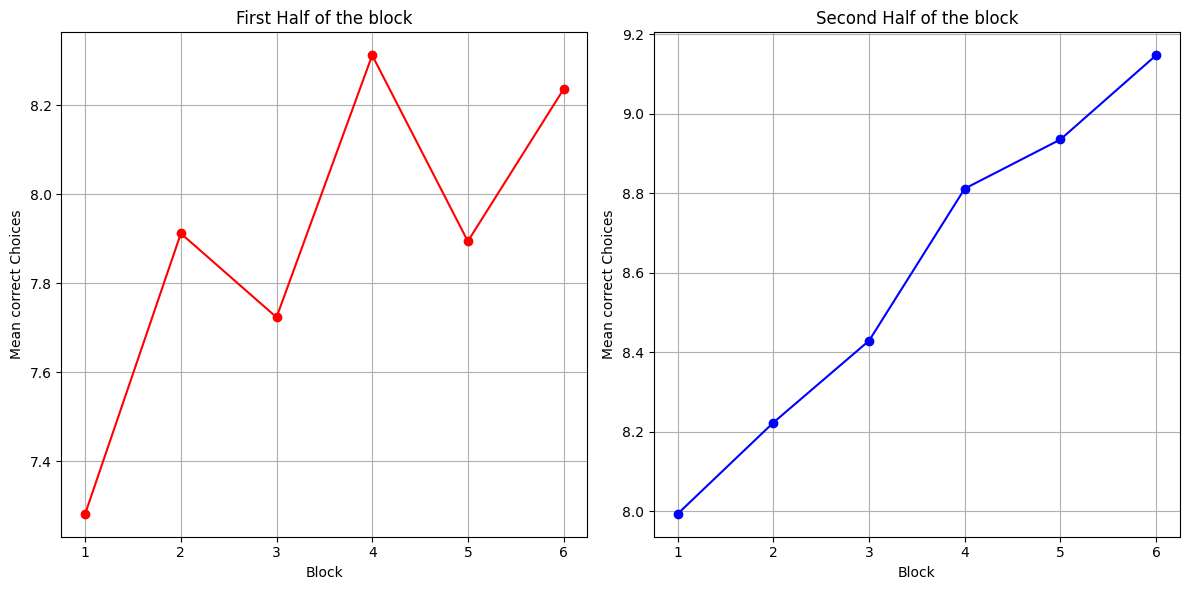

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

num_subjects = len(data)

# Estrarre i valori per la prima metà di ogni blocco (trials 1-5 per ogni blocco)
first_half_values = [
    [np.mean(user_data[idx]["number_of_correct_choices"][(i * 10):(i * 10 + 5)]) for idx in range(num_subjects)]
    for i in range(6)
]

# Estrarre i valori per la seconda metà di ogni blocco (trials 6-10 per ogni blocco)
second_half_values = [
    [np.mean(user_data[idx]["number_of_correct_choices"][(i * 10 + 5):(i * 10 + 10)]) for idx in range(num_subjects)]
    for i in range(6)
]

# Calcolare la media per ciascun blocco
mean_first_half = np.mean(first_half_values, axis=1)
mean_second_half = np.mean(second_half_values, axis=1)

# Calcolare la correlazione di Pearson (R)
x = np.arange(1, 7)  # Blocchi da 1 a 6
r_first_half, p_first_half = pearsonr(x, mean_first_half)
r_second_half, p_second_half = pearsonr(x, mean_second_half)

# Stampare i coefficienti di correlazione Pearson
print(f"Pearson correlation coefficient (First Half R): {r_first_half}")
print(f"P-value (First Half): {p_first_half}")
print(f"Pearson correlation coefficient (Second Half R): {r_second_half}")
print(f"P-value (Second Half): {p_second_half}")

# Creare la figura
plt.figure(figsize=(12, 6))

# Grafico per la prima metà dei blocchi
plt.subplot(1, 2, 1)
plt.plot(x, mean_first_half, marker='o', linestyle='-', color='r', label='First Half of Blocks')
plt.title("First Half of the block")
plt.xlabel("Block")
plt.ylabel("Mean correct Choices")
plt.grid(True)

# # Annotare il valore della correlazione sul grafico
# plt.text(4, max(mean_first_half) - 1, f'R = {r_first_half:.2f}', fontsize=12, ha='center', color='red')

# Grafico per la seconda metà dei blocchi
plt.subplot(1, 2, 2)
plt.plot(x, mean_second_half, marker='o', linestyle='-', color='b', label='Second Half of Blocks')
plt.title("Second Half of the block")
plt.xlabel("Block")
plt.ylabel("Mean correct Choices")
plt.grid(True)

# # Annotare il valore della correlazione sul grafico
# plt.text(4, max(mean_second_half) - 1, f'R = {r_second_half:.2f}', fontsize=12, ha='center', color='red')

# # Impostare il titolo principale
# plt.suptitle("Learning Trend: correct Choices First and Second Half of Each Block", fontsize=16)

# Mostrare il grafico
plt.tight_layout()
plt.savefig("Out/learning_first_second_half_correctchoices.png", dpi=300)
plt.show()


Pearson correlation coefficient (First Half R): 0.7601
P-value (First Half): 0.0794
Pearson correlation coefficient (Second Half R): 0.9930
P-value (Second Half): 0.0001


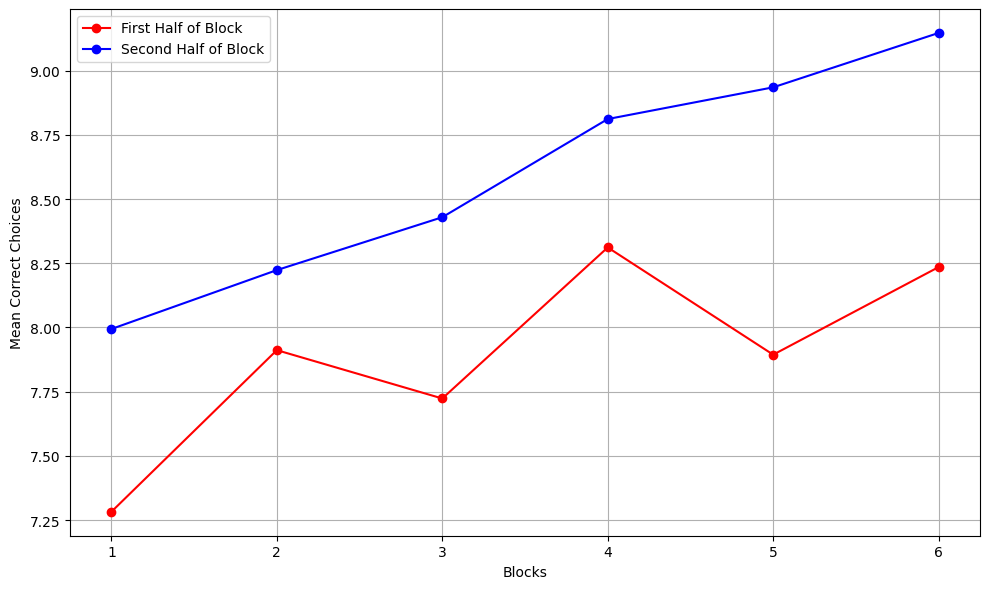

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

num_subjects = len(user_data)

# Prima metà dei blocchi: trials 1-5 (per ogni blocco da 10)
first_half_values = [
    [np.mean(user_data[idx]["number_of_correct_choices"][(i * 10):(i * 10 + 5)]) for idx in range(num_subjects)]
    for i in range(6)
]

# Seconda metà dei blocchi: trials 6-10
second_half_values = [
    [np.mean(user_data[idx]["number_of_correct_choices"][(i * 10 + 5):(i * 10 + 10)]) for idx in range(num_subjects)]
    for i in range(6)
]

# Calcola le medie
mean_first_half = np.mean(first_half_values, axis=1)
mean_second_half = np.mean(second_half_values, axis=1)

# Asse X: blocchi da 1 a 6
x = np.arange(1, 7)

# Calcola la correlazione Pearson
r_first_half, p_first_half = pearsonr(x, mean_first_half)
r_second_half, p_second_half = pearsonr(x, mean_second_half)

# Stampa i valori
print(f"Pearson correlation coefficient (First Half R): {r_first_half:.4f}")
print(f"P-value (First Half): {p_first_half:.4f}")
print(f"Pearson correlation coefficient (Second Half R): {r_second_half:.4f}")
print(f"P-value (Second Half): {p_second_half:.4f}")

# Plot unico
plt.figure(figsize=(10, 6))

plt.plot(x, mean_first_half, marker='o', linestyle='-', color='red', label='First Half of Block')
plt.plot(x, mean_second_half, marker='o', linestyle='-', color='blue', label='Second Half of Block')


plt.xlabel("Blocks")
plt.ylabel("Mean Correct Choices")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("Out/learning_first_second_half_correctchoices_combined.png", dpi=300)
plt.show()


In [21]:
from scipy.stats import ttest_rel

# Convertiamo le liste in array numpy per facilitare l'uso
first_half_array = np.array(first_half_values)  # shape (6 blocchi, n soggetti)
second_half_array = np.array(second_half_values)

# Calcola la differenza media e il t-test per ogni blocco
for i in range(6):
    t_stat, p_value = ttest_rel(first_half_array[i], second_half_array[i])
    delta = np.mean(second_half_array[i]) - np.mean(first_half_array[i])
    print(f"Blocco {i+1}: Δ = {delta:.4f}, t = {t_stat:.4f}, p = {p_value:.4f}")


Blocco 1: Δ = 0.7118, t = -3.1301, p = 0.0036
Blocco 2: Δ = 0.3118, t = -1.2171, p = 0.2322
Blocco 3: Δ = 0.7059, t = -3.3648, p = 0.0020
Blocco 4: Δ = 0.5000, t = -2.6581, p = 0.0120
Blocco 5: Δ = 1.0412, t = -5.6176, p = 0.0000
Blocco 6: Δ = 0.9118, t = -4.1647, p = 0.0002



=== Analisi del Rapporto (Second Half / First Half) ===
Ratio per blocco: [1.0977, 1.0394, 1.0914, 1.0602, 1.1319, 1.1107]
Media dei ratio: 1.0885
T-statistic: 6.4332
P-value: 0.0013
→ La ratio è significativamente diversa da 1.


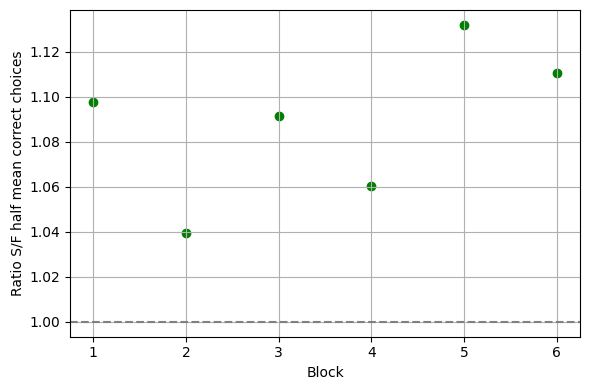

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

# Calcolare la ratio (seconda metà / prima metà) per ciascun blocco
ratios = mean_second_half / (mean_first_half + 1e-8)  # evitare divisione per zero

# Calcolare la media delle ratio
mean_ratio = np.mean(ratios)

# Test: la media delle ratio è significativamente diversa da 1?
t_stat, p_value = ttest_1samp(ratios, popmean=1)

# Stampare i risultati
print(f"\n=== Analisi del Rapporto (Second Half / First Half) ===")
print(f"Ratio per blocco: {[round(r, 4) for r in ratios]}")
print(f"Media dei ratio: {mean_ratio:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("→ La ratio è significativamente diversa da 1.")
else:
    print("→ Nessuna differenza significativa tra seconda e prima metà.")

# Grafico delle ratio (solo punti)
plt.figure(figsize=(6, 4))
plt.scatter(x, ratios, color='green', label='Second Half / First Half Ratio')
plt.axhline(1, color='gray', linestyle='--')  # Riferimento: ratio = 1
plt.xlabel("Block")
plt.ylabel("Ratio S/F half mean correct choices")
plt.xticks(x)
plt.grid(True)
plt.tight_layout()
plt.show()


% correct choices over first 10 actions

Pearson correlation coefficient (First Half R): 0.7325257220591502
P-value (First Half): 0.09774584619814285
Pearson correlation coefficient (Second Half R): 0.8699756943579833
P-value (Second Half): 0.024260363823301545


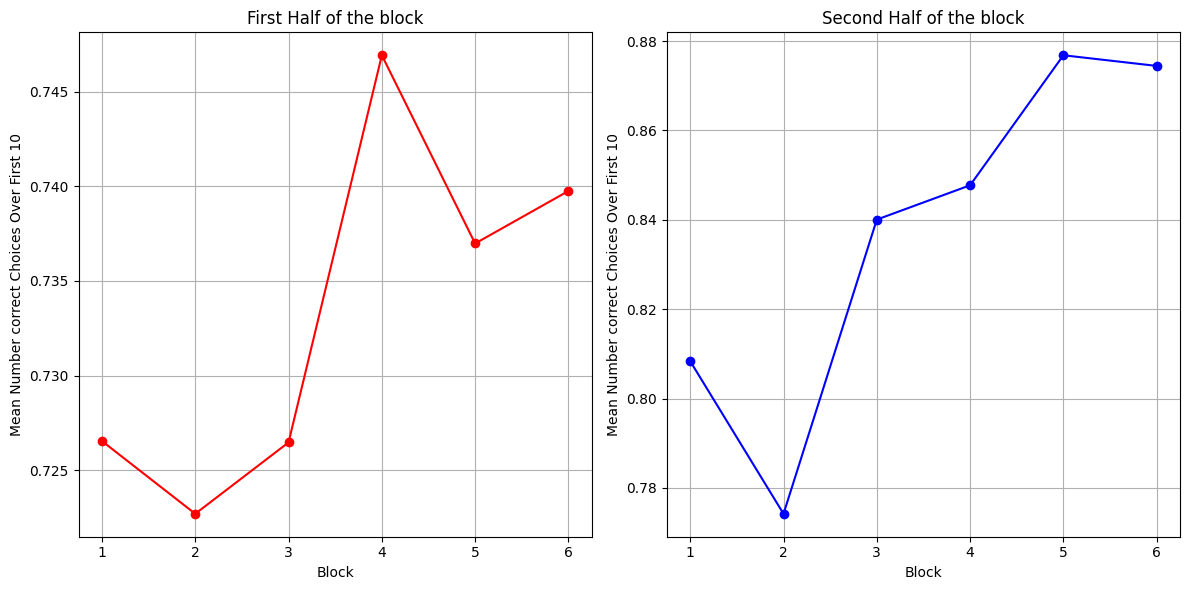

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

num_subjects = len(data)

# Estrarre i valori per la prima metà di ogni blocco (trials 1-5 per ogni blocco)
first_half_values = [
    [np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 10):(i * 10 + 5)]) for idx in range(num_subjects)]
    for i in range(6)
]

# Estrarre i valori per la seconda metà di ogni blocco (trials 6-10 per ogni blocco)
second_half_values = [
    [np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 10 + 5):(i * 10 + 10)]) for idx in range(num_subjects)]
    for i in range(6)
]

# Calcolare la media per ciascun blocco
mean_first_half = np.mean(first_half_values, axis=1)
mean_second_half = np.mean(second_half_values, axis=1)

# Calcolare la correlazione di Pearson (R)
x = np.arange(1, 7)  # Blocchi da 1 a 6
r_first_half, p_first_half = pearsonr(x, mean_first_half)
r_second_half, p_second_half = pearsonr(x, mean_second_half)

# Stampare i coefficienti di correlazione Pearson
print(f"Pearson correlation coefficient (First Half R): {r_first_half}")
print(f"P-value (First Half): {p_first_half}")
print(f"Pearson correlation coefficient (Second Half R): {r_second_half}")
print(f"P-value (Second Half): {p_second_half}")

# Creare la figura
plt.figure(figsize=(12, 6))

# Grafico per la prima metà dei blocchi
plt.subplot(1, 2, 1)
plt.plot(x, mean_first_half, marker='o', linestyle='-', color='r', label='First Half of Blocks')
plt.title("First Half of the block")
plt.xlabel("Block")
plt.ylabel("Mean Number correct Choices Over First 10")
plt.grid(True)

# # Annotare il valore della correlazione sul grafico
# plt.text(4, max(mean_first_half) - 1, f'R = {r_first_half:.2f}', fontsize=12, ha='center', color='red')

# Grafico per la seconda metà dei blocchi
plt.subplot(1, 2, 2)
plt.plot(x, mean_second_half, marker='o', linestyle='-', color='b', label='Second Half of Blocks')
plt.title("Second Half of the block")
plt.xlabel("Block")
plt.ylabel("Mean Number correct Choices Over First 10")
plt.grid(True)

# # Annotare il valore della correlazione sul grafico
# plt.text(4, max(mean_second_half) - 1, f'R = {r_second_half:.2f}', fontsize=12, ha='center', color='red')

# # Impostare il titolo principale
# plt.suptitle("Learning Trend: Number correct Choices Over First 10 in First and Second Half of Each Block", fontsize=16)

# Mostrare il grafico
plt.tight_layout()
plt.savefig("Out/learning_first_second_half_over_first_10.png", dpi=300)
plt.show()


Pearson correlation coefficient (First Half R): 0.7325
P-value (First Half): 0.0977
Pearson correlation coefficient (Second Half R): 0.8700
P-value (Second Half): 0.0243


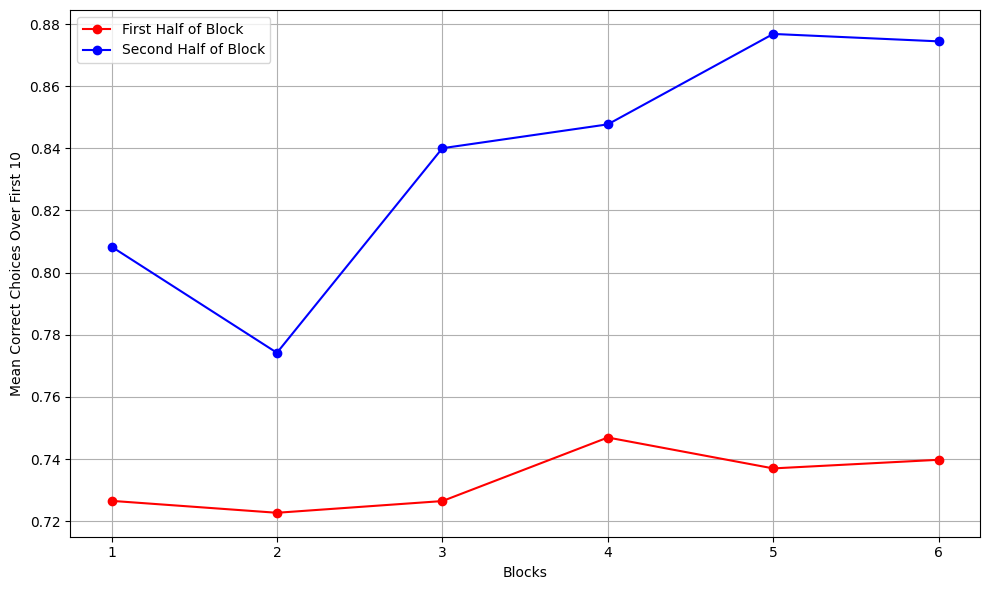

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

num_subjects = len(user_data)

# Estrai i valori per la prima metà di ciascun blocco (trials 1-5)
first_half_values = [
    [np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 10):(i * 10 + 5)]) for idx in range(num_subjects)]
    for i in range(6)
]

# Estrai i valori per la seconda metà di ciascun blocco (trials 6-10)
second_half_values = [
    [np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 10 + 5):(i * 10 + 10)]) for idx in range(num_subjects)]
    for i in range(6)
]

# Calcola la media per blocco
mean_first_half = np.mean(first_half_values, axis=1)
mean_second_half = np.mean(second_half_values, axis=1)

# Blocchi da 1 a 6
x = np.arange(1, 7)

# Correlazione Pearson
r_first_half, p_first_half = pearsonr(x, mean_first_half)
r_second_half, p_second_half = pearsonr(x, mean_second_half)

# Output statistico
print(f"Pearson correlation coefficient (First Half R): {r_first_half:.4f}")
print(f"P-value (First Half): {p_first_half:.4f}")
print(f"Pearson correlation coefficient (Second Half R): {r_second_half:.4f}")
print(f"P-value (Second Half): {p_second_half:.4f}")

# Plot unico con legenda
plt.figure(figsize=(10, 6))

plt.plot(x, mean_first_half, marker='o', linestyle='-', color='red', label='First Half of Block')
plt.plot(x, mean_second_half, marker='o', linestyle='-', color='blue', label='Second Half of Block')

plt.xlabel("Blocks")
plt.ylabel("Mean Correct Choices Over First 10")
plt.xticks(x)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("Out/learning_first_second_half_over_first_10_combined.png", dpi=300)
plt.show()



=== Analisi della Ratio (Second Half / First Half) ===
Ratio per blocco: [1.1126, 1.0713, 1.1563, 1.135, 1.1898, 1.1821]
Media dei ratio: 1.1412
T-statistic: 7.7297
P-value: 0.0006
→ La ratio è significativamente diversa da 1.


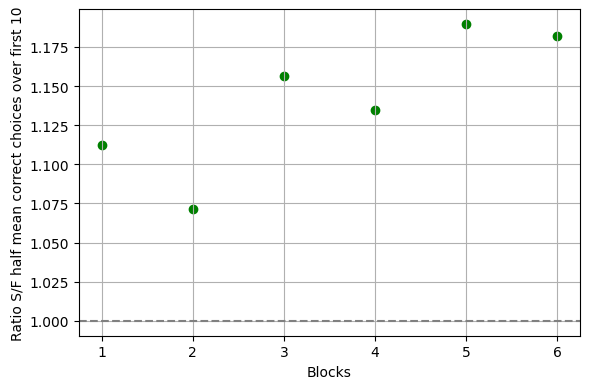

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

# Numero di soggetti
num_subjects = len(data)

# Estrarre i valori per la prima metà di ogni blocco (trials 1-5 per ogni blocco)
first_half_values = [
    [np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 10):(i * 10 + 5)]) for idx in range(num_subjects)]
    for i in range(6)
]

# Estrarre i valori per la seconda metà di ogni blocco (trials 6-10 per ogni blocco)
second_half_values = [
    [np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 10 + 5):(i * 10 + 10)]) for idx in range(num_subjects)]
    for i in range(6)
]

# Calcolare la media per ciascun blocco
mean_first_half = np.mean(first_half_values, axis=1)
mean_second_half = np.mean(second_half_values, axis=1)

# === Calcolo della ratio tra la seconda metà e la prima metà ===
ratios = mean_second_half / (mean_first_half + 1e-8)  # evitare divisione per zero
mean_ratio = np.mean(ratios)

# Test: la media della ratio è significativamente diversa da 1
t_stat, p_value = ttest_1samp(ratios, popmean=1)

# Stampa dei risultati
print(f"\n=== Analisi della Ratio (Second Half / First Half) ===")
print(f"Ratio per blocco: {[round(r, 4) for r in ratios]}")
print(f"Media dei ratio: {mean_ratio:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("→ La ratio è significativamente diversa da 1.")
else:
    print("→ Nessuna differenza significativa tra seconda e prima metà.")

# === Grafico della ratio (solo i punti) ===
plt.figure(figsize=(6, 4))
plt.scatter(np.arange(1, 7), ratios, color='green', label='Second Half / First Half Ratio')
plt.axhline(1, color='gray', linestyle='--')  # Linea di riferimento: ratio = 1
plt.xlabel("Blocks")
plt.ylabel("Ratio S/F half mean correct choices over first 10")
plt.grid(True)
plt.tight_layout()
plt.show()


Percent correct choices over actions

Pearson correlation coefficient (First Half R): -0.6262899064629645
P-value (First Half): 0.183392818314323
Pearson correlation coefficient (Second Half R): 0.43350078448892254
P-value (Second Half): 0.39048119208890164


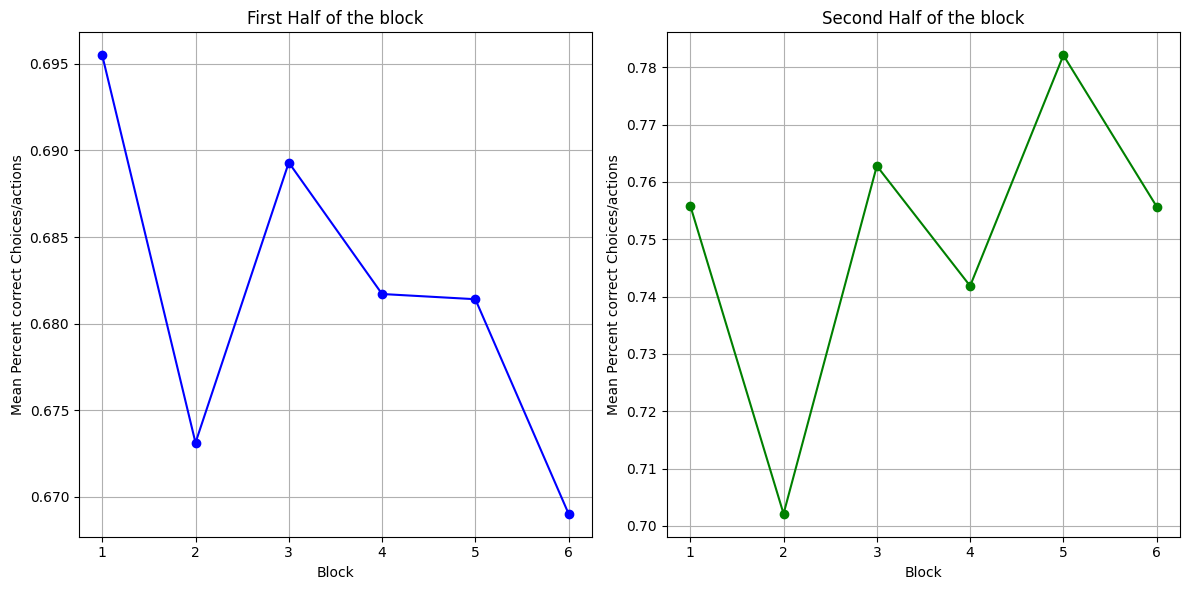

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

num_subjects = len(data)

# Estrarre i valori per la prima metà di ogni blocco (trials 1-5 per ogni blocco)
first_half_values = [
    [np.mean(user_data[idx]["percent_correct_choices_over_actions"][(i * 10):(i * 10 + 5)]) for idx in range(num_subjects)]
    for i in range(6)
]

# Estrarre i valori per la seconda metà di ogni blocco (trials 6-10 per ogni blocco)
second_half_values = [
    [np.mean(user_data[idx]["percent_correct_choices_over_actions"][(i * 10 + 5):(i * 10 + 10)]) for idx in range(num_subjects)]
    for i in range(6)
]

# Calcolare la media per ciascun blocco
mean_first_half = np.mean(first_half_values, axis=1)
mean_second_half = np.mean(second_half_values, axis=1)

# Calcolare la correlazione di Pearson (R)
x = np.arange(1, 7)  # Blocchi da 1 a 6
r_first_half, p_first_half = pearsonr(x, mean_first_half)
r_second_half, p_second_half = pearsonr(x, mean_second_half)

# Stampare i coefficienti di correlazione Pearson
print(f"Pearson correlation coefficient (First Half R): {r_first_half}")
print(f"P-value (First Half): {p_first_half}")
print(f"Pearson correlation coefficient (Second Half R): {r_second_half}")
print(f"P-value (Second Half): {p_second_half}")

# Creare la figura
plt.figure(figsize=(12, 6))

# Grafico per la prima metà dei blocchi
plt.subplot(1, 2, 1)
plt.plot(x, mean_first_half, marker='o', linestyle='-', color='b', label='First Half of Blocks')
plt.title("First Half of the block")
plt.xlabel("Block")
plt.ylabel("Mean Percent correct Choices/actions")
plt.grid(True)

# # Annotare il valore della correlazione sul grafico
# plt.text(4, max(mean_first_half) - 1, f'R = {r_first_half:.2f}', fontsize=12, ha='center', color='red')

# Grafico per la seconda metà dei blocchi
plt.subplot(1, 2, 2)
plt.plot(x, mean_second_half, marker='o', linestyle='-', color='g', label='Second Half of Blocks')
plt.title("Second Half of the block")
plt.xlabel("Block")
plt.ylabel("Mean Percent correct Choices/actions")
plt.grid(True)

# # Annotare il valore della correlazione sul grafico
# plt.text(4, max(mean_second_half) - 1, f'R = {r_second_half:.2f}', fontsize=12, ha='center', color='red')

# # Impostare il titolo principale
# plt.suptitle("Learning Trend: Percent correct Choices First and Second Half of Each Block", fontsize=16)

# Mostrare il grafico
plt.tight_layout()
plt.savefig("Out/learning_first_second_half_percent_correct_choices_over actions.png", dpi=300)
plt.show()


Learning prima VS seconda metà dell'ESPERIMENTO

correct choices

Pearson correlation coefficient (First Half R): 0.8746967624953834
P-value (First Half): 0.3221210237388721
Pearson correlation coefficient (Second Half R): 0.4677675811188189
P-value (Second Half): 0.6901168588187987


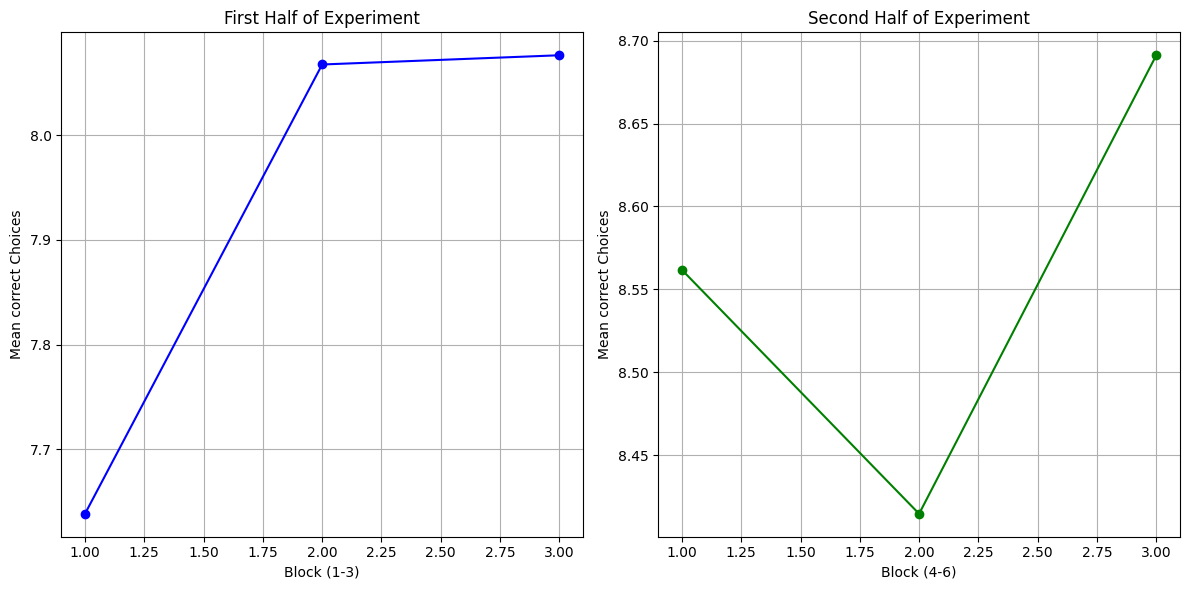

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

num_subjects = len(data)

# Estrarre i valori per la prima metà dell'esperimento (trials 1-30), divisi in 3 blocchi da 10 trials
first_half_values = [
    [np.mean(user_data[idx]["number_of_correct_choices"][(i * 10):(i * 10 + 10)]) for idx in range(num_subjects)]
    for i in range(3)  # 3 blocchi per la prima metà dell'esperimento
]

# Estrarre i valori per la seconda metà dell'esperimento (trials 31-60), divisi in 3 blocchi da 10 trials
second_half_values = [
    [np.mean(user_data[idx]["number_of_correct_choices"][(i * 10 + 30):(i * 10 + 40)]) for idx in range(num_subjects)]
    for i in range(3)  # 3 blocchi per la seconda metà dell'esperimento
]

# Calcolare la media per ciascun blocco (primo e secondo metà)
mean_first_half = np.mean(first_half_values, axis=1)
mean_second_half = np.mean(second_half_values, axis=1)

# Calcolare la correlazione di Pearson (R)
x = np.arange(1, 4)  # Blocchi da 1 a 3 (poiché abbiamo 3 blocchi per metà)
r_first_half, p_first_half = pearsonr(x, mean_first_half)
r_second_half, p_second_half = pearsonr(x, mean_second_half)

# Stampare i coefficienti di correlazione Pearson
print(f"Pearson correlation coefficient (First Half R): {r_first_half}")
print(f"P-value (First Half): {p_first_half}")
print(f"Pearson correlation coefficient (Second Half R): {r_second_half}")
print(f"P-value (Second Half): {p_second_half}")

# Creare la figura
plt.figure(figsize=(12, 6))

# Grafico per la prima metà dell'esperimento (trials 1-30)
plt.subplot(1, 2, 1)
plt.plot(x, mean_first_half, marker='o', linestyle='-', color='b', label='First Half of Experiment (Trials 1-30)')
plt.title("First Half of Experiment")
plt.xlabel("Block (1-3)")
plt.ylabel("Mean correct Choices")
plt.grid(True)


# Grafico per la seconda metà dell'esperimento (trials 31-60)
plt.subplot(1, 2, 2)
plt.plot(x, mean_second_half, marker='o', linestyle='-', color='g', label='Second Half of Experiment (Trials 31-60)')
plt.title("Second Half of Experiment")
plt.xlabel("Block (4-6)")
plt.ylabel("Mean correct Choices")
plt.grid(True)


# Mostrare il grafico
plt.tight_layout()
plt.show()

correct choices over first 10 actions

Pearson correlation coefficient (First Half R): 0.45360163037328743
P-value (First Half): 0.7002778143691615
Pearson correlation coefficient (Second Half R): 0.8745646129626804
P-value (Second Half): 0.3222945608191903


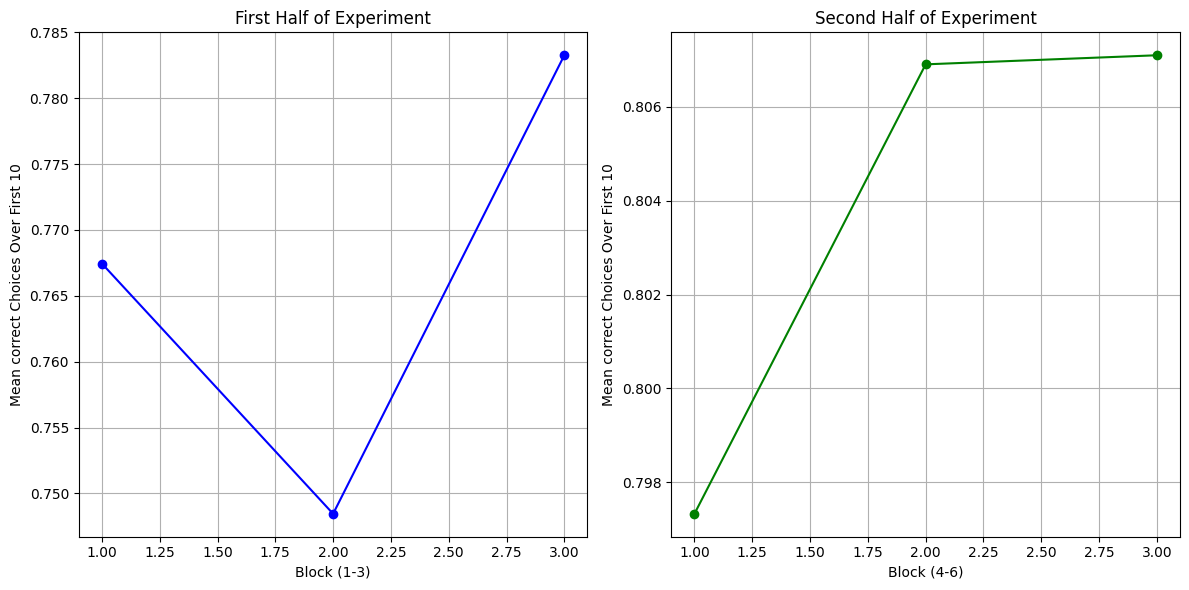

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

num_subjects = len(data)

# Estrarre i valori per la prima metà dell'esperimento (trials 1-30), divisi in 3 blocchi da 10 trials
first_half_values = [
    [np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 10):(i * 10 + 10)]) for idx in range(num_subjects)]
    for i in range(3)  # 3 blocchi per la prima metà dell'esperimento
]

# Estrarre i valori per la seconda metà dell'esperimento (trials 31-60), divisi in 3 blocchi da 10 trials
second_half_values = [
    [np.mean(user_data[idx]["number_correct_choices_over_first_10"][(i * 10 + 30):(i * 10 + 40)]) for idx in range(num_subjects)]
    for i in range(3)  # 3 blocchi per la seconda metà dell'esperimento
]

# Calcolare la media per ciascun blocco (primo e secondo metà)
mean_first_half = np.mean(first_half_values, axis=1)
mean_second_half = np.mean(second_half_values, axis=1)

# Calcolare la correlazione di Pearson (R)
x = np.arange(1, 4)  # Blocchi da 1 a 3 (poiché abbiamo 3 blocchi per metà)
r_first_half, p_first_half = pearsonr(x, mean_first_half)
r_second_half, p_second_half = pearsonr(x, mean_second_half)

# Stampare i coefficienti di correlazione Pearson
print(f"Pearson correlation coefficient (First Half R): {r_first_half}")
print(f"P-value (First Half): {p_first_half}")
print(f"Pearson correlation coefficient (Second Half R): {r_second_half}")
print(f"P-value (Second Half): {p_second_half}")

# Creare la figura
plt.figure(figsize=(12, 6))

# Grafico per la prima metà dell'esperimento (trials 1-30)
plt.subplot(1, 2, 1)
plt.plot(x, mean_first_half, marker='o', linestyle='-', color='b', label='First Half of Experiment (Trials 1-30)')
plt.title("First Half of Experiment")
plt.xlabel("Block (1-3)")
plt.ylabel("Mean correct Choices Over First 10")
plt.grid(True)

# Grafico per la seconda metà dell'esperimento (trials 31-60)
plt.subplot(1, 2, 2)
plt.plot(x, mean_second_half, marker='o', linestyle='-', color='g', label='Second Half of Experiment (Trials 31-60)')
plt.title("Second Half of Experiment")
plt.xlabel("Block (4-6)")
plt.ylabel("Mean correct Choices Over First 10")
plt.grid(True)

# Mostrare il grafico
plt.tight_layout()
plt.show()


% correct choices/ actions

Pearson correlation coefficient (First Half R): 0.00830520780320794
P-value (First Half): 0.9947126797142143
Pearson correlation coefficient (Second Half R): 0.025371487981502714
P-value (Second Half): 0.9838462757216229


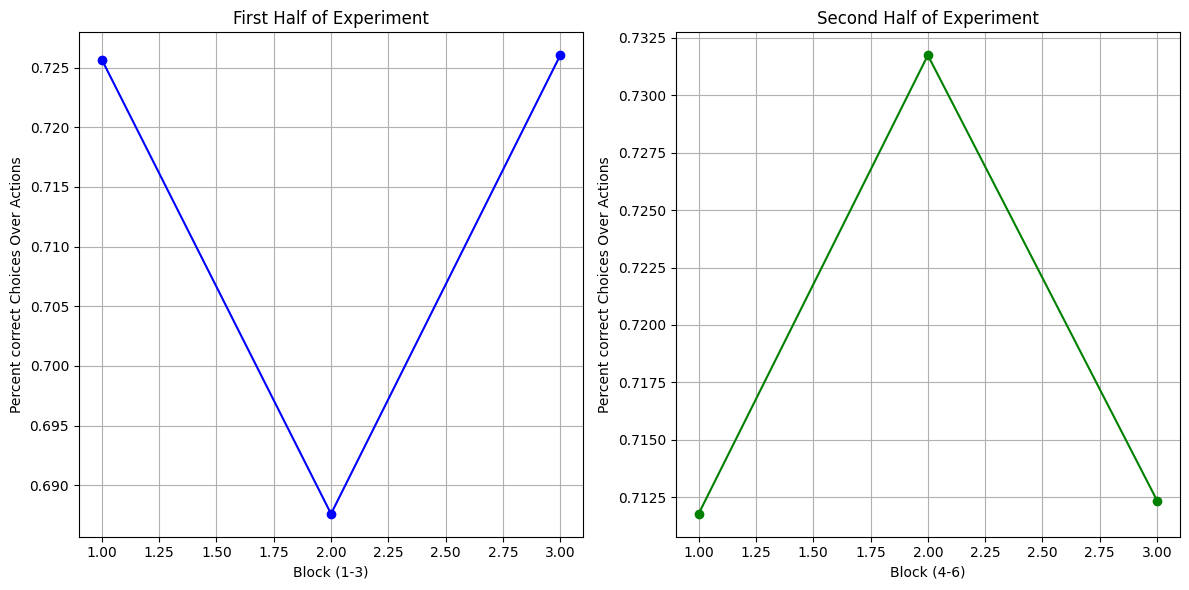

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

num_subjects = len(data)

# Estrarre i valori per la prima metà dell'esperimento (trials 1-30), divisi in 3 blocchi da 10 trials
first_half_values = [
    [np.mean(user_data[idx]["percent_correct_choices_over_actions"][(i * 10):(i * 10 + 10)]) for idx in range(num_subjects)]
    for i in range(3)  # 3 blocchi per la prima metà dell'esperimento
]

# Estrarre i valori per la seconda metà dell'esperimento (trials 31-60), divisi in 3 blocchi da 10 trials
second_half_values = [
    [np.mean(user_data[idx]["percent_correct_choices_over_actions"][(i * 10 + 30):(i * 10 + 40)]) for idx in range(num_subjects)]
    for i in range(3)  # 3 blocchi per la seconda metà dell'esperimento
]

# Calcolare la media per ciascun blocco (primo e secondo metà)
mean_first_half = np.mean(first_half_values, axis=1)
mean_second_half = np.mean(second_half_values, axis=1)

# Calcolare la correlazione di Pearson (R)
x = np.arange(1, 4)  # Blocchi da 1 a 3 (poiché abbiamo 3 blocchi per metà)
r_first_half, p_first_half = pearsonr(x, mean_first_half)
r_second_half, p_second_half = pearsonr(x, mean_second_half)

# Stampare i coefficienti di correlazione Pearson
print(f"Pearson correlation coefficient (First Half R): {r_first_half}")
print(f"P-value (First Half): {p_first_half}")
print(f"Pearson correlation coefficient (Second Half R): {r_second_half}")
print(f"P-value (Second Half): {p_second_half}")

# Creare la figura
plt.figure(figsize=(12, 6))

# Grafico per la prima metà dell'esperimento (trials 1-30)
plt.subplot(1, 2, 1)
plt.plot(x, mean_first_half, marker='o', linestyle='-', color='b', label='First Half of Experiment (Trials 1-30)')
plt.title("First Half of Experiment")
plt.xlabel("Block (1-3)")
plt.ylabel("Percent correct Choices Over Actions")
plt.grid(True)

# Grafico per la seconda metà dell'esperimento (trials 31-60)
plt.subplot(1, 2, 2)
plt.plot(x, mean_second_half, marker='o', linestyle='-', color='g', label='Second Half of Experiment (Trials 31-60)')
plt.title("Second Half of Experiment")
plt.xlabel("Block (4-6)")
plt.ylabel("Percent correct Choices Over Actions")
plt.grid(True)

# Mostrare il grafico
plt.tight_layout()
plt.show()
